___


# Setup

In [ ]:
# import modules
import helpers.overunderfitting as ov
import seaborn as sns

# plotting layout setup
sns.set_style(style='darkgrid')
%matplotlib inline
    
# auto reload of custom modules
%load_ext autoreload
%autoreload 2

# Important Resources

+ [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) _(link to downlad the .pdf version)_
+ [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/) _(github.io based e-book)_

+ https://en.wikipedia.org/wiki/Statistical_data_type
+ https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
+ https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689
+ https://www.simplypsychology.org/likert-scale.html

DFA (Discriminant Function Analysis) can  (level of impact the variable has on the problem at hand)

___

# Interpretability vs Predictive Power

### Context

Suppose that we observe a quantitative response $Y$ and $p$ different predictors $X = X1, X2,...,Xp$. We assume that there is some relationship between them, which can be written in the very general form: 

$$Y = f(X) + \epsilon$$

+ $f$ is some fixed but unknown function of $X$.
+ $\epsilon$ is a random error term, which is independent of $X$ and has mean zero.

### Estimate function

We create an estimate $\hat{f}$ that predicts $Y$: $\hat{Y} = \hat{f}(X)$. There will always be two errors elements:

$$E (Y - \hat{Y}) = [f(X) - \hat{f}(X)]^{2} + Var(\epsilon)$$

Where:
+ $E (Y - \hat{Y})$ is the average squared error of predictions.
+ $[f(X) - \hat{f}(X)]^{2} $ is the reducible error. Our aim is to reduce this error.
+ $Var(\epsilon)$ is the irreducible error, that cannot be predicted using $X$.

### Predictions

Here, we are not overly concern with the shape of $\hat{f}$, as long as it yields accurate predictions for $Y$: we treat it as a black box.

### Inference

We want to understand the way that $Y$ is affected as $X$ changes, so we cannot treat $\hat{f}$ as a black box:

+ Which predictors are associated with the response? Which ones are the most important?
+ What is the relationship between the response and each predictor: positive or negative? Is there covariance?
+ Can the relationship between $Y$ and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?

___

# Parametric vs Non-Parametric Methods

### Parametric Models

1. We make an **assumption about the functional form**, or shape, of $f$, the simplest of which is that it is linear.
2. We fit the model to a training set. It finds the values of the function's parameters that match $Y_{train}$ more closely.

Example for a linear model:
1. $f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p$.
2. Find values of $\beta_0, ..., \beta_p$ that minimizes the gaps between $\hat{Y}_{train}$ and $Y_{train}$.

The potential disadvantage of a parametric approach is that the model we choose will usually **not match the true unknown form of $f$**. 

+ If the chosen model is too far from the true $f$, then our estimate will be poor (underfitting). 
+ We can fit a more flexible model, that can fit different possible functional forms, but that:
    + requires estimating a greater number of parameters.
    + can lead to following the noise to closely (overfitting).

### Non-Parametric Models

Non-parametric methods **do not make explicit assumptions about the functional form** of $f$. Instead they seek an estimate of $f$ that gets as close to the data points as possible, without being too rough.

While non-parametric approaches avoid the issues of parametrics assumptions, they suffer from a major disadvantage: since they do not reduce the problem of estimating $f$ to a small number of parameters, a **very large number of observations** (far more
than is typically needed for a parametric approach) is required in order to obtain an accurate estimate for $f$.

### Trade-off

+ **Linear models** allow for relatively **simple and interpretable** inference, but may not yield as accurate predictions as some other approaches. 
+ Highly **non-linear** approaches may provide predictions that are **more accurate**, but this comes at the expense of **less interpretability**.

___

# Measuring Quality of Fit - Bias vs Variance

### Goal

A good model **accurately predicts** the desired target value for **new data**. 

### Bias: how well the model approximates the data

It refers to the error that is introduced by **approximating a real-life problem**, which may be extremely complicated, by a **much simpler model**.

+ does the model capture the **relevant relations** between features and target outputs?
+ quantifies the average difference to be expected between an estimator and an underlying parameter.

*See also this link on [Inductive Bias](https://en.m.wikipedia.org/wiki/Inductive_bias).*

### Variance: stability of the model in response to new training examples

It refers to the **amount** by which our **model would change** if we estimated it using a **different training set**.

+ does the model **ignore the random noise** in the training data?
+ quantifies the spread of estimator values around their mean. 

### Visual Representation

The figure below illustrates the range of predictions for a given input by a model trained with different datasets, depending on its bias and variance _([source](http://scott.fortmann-roe.com/docs/BiasVariance.html))_:

<img src="https://sebastienplat.s3.amazonaws.com/a9a3a238b8b5a0bfe07d83b1f07c85bd1472143621831" align=left>

### Trade-off

There is no escaping the relationship between bias and variance in machine learning.

+ Increasing the bias will decrease the variance.
+ Increasing the variance will decrease the bias.

_Note: More complex models have typically less bias, at the risk of modelling more noise from the training set and therefore suffer from higher variance._

### Illustration on Toy Example

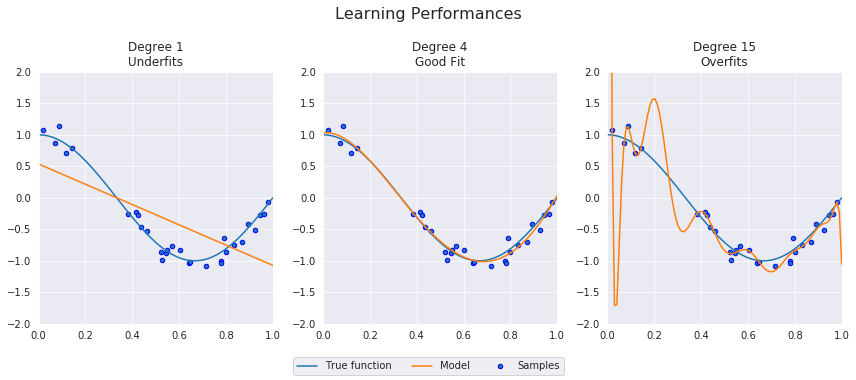

In [4]:
overunderfitting_example()

### Further Reading

+ [Different meanings of bias](https://www.quora.com/What-is-bias-in-machine-learning-algorithms)
+ [Read N°1 on biased data](https://towardsdatascience.com/preventing-machine-learning-bias-d01adfe9f1fa)
+ [Read N°2 on biased data](https://towardsdatascience.com/identifying-and-correcting-label-bias-in-machine-learning-ed177d30349e)

___

# Model Performance - Prediction Error

### Prediction Error

The figure below shows the relationship between model complexity and training/validation errors. The optimal model has the lowest generalization error, and is marked by a dashed line.

+ A model that is **too simple** will not predict either set accurately: both training & validation errors will be high *(left)*.
+ A model that is **too complex** will capture the noise in the training set and generalize poorly: its validation error will be much higher *(right)*.

<img src=https://sebastienplat.s3.amazonaws.com/d349c234f3a819be20b29ad950e629701472143635989 align=left>

### Mathematical Expressions

More generally, the **expected MSE of a given observation $x_0$** refers to the average test MSE that we would obtain if we repeatedly estimated $f$ using a **large number of training sets**, and tested each at $𝑥_0$. 

$$\operatorname{E}\Big[\big(y_0 - \hat{f}(x_0)\big)^2\Big] = \Big(\operatorname{Bias}\big[\hat{f}(x_0)\big] \Big) ^2 + \operatorname{Var}\big[\hat{f}(x_0)\big] + \operatorname{Var}(\epsilon)$$

$\operatorname{Bias}\big[\hat{f}(x_0)\big] = \operatorname{E}\big[\hat{f}(x_0)\big] - f(x_0)\qquad\qquad$ _Bias = Average Error_

$\operatorname{Var}\big[\hat{f}(x_0)\big] = \operatorname{E}\big[\hat{f}(x_0)^2\big] - \operatorname{E}\big[{\hat{f}}(x_0)\big]^2\qquad$ _Variance = Average Variation of the Prediction around its Mean_

$\operatorname{Var}(\epsilon)\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ _Irreducible Error = Variance of the Random Error Term_

+ _Note1: The **overall expected value** can be computed by averaging the expected value of all $x_0$ in the data set._
+ _Note2: It is not possible to properly split the training MSE because the training set is different for each iteration of the training process._

### Illustration of Training vs Test Errors

In the regression setting, the most commonly-used measure is the mean squared error (MSE). We can break down the Test MSE for a simple example where we know:

+ the true underlying function $f$.
+ the irreducible error $\operatorname{Var}(\epsilon)$, which corresponds to the lowest achievable test MSE.

_Note: In a real-life situation in which $f$ is unobserved, it is generally not possible to explicitly compute the test MSE, bias, or variance for a statistical learning method. We can use cross-validation to estimate the test MSE using the training data._

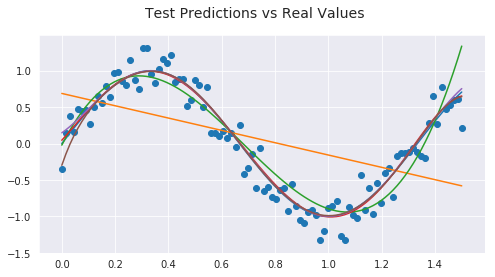

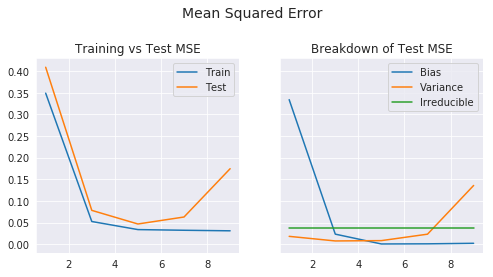

In [488]:
# example of over- and underfitting polynomial models for a simple function
degrees = range(1, 11, 2)
ouf_cos = ov.OverUnderFit(true_func='cos')
ouf_cos.overunderfitting_example(degrees=degrees, test_size=50, n_iterations=100)

In the example above, the irreducible error is the variance of the added noise `0.2 * np.random.randn(X)`; its variance is equal to `0.2**2 = 0.04` as showed in the green line.

___

# Classification Setting

### Classification Error Rate

The Bias-Variance tradeoff also applies to Classification problems, where the **Error Rate** is defined as follows:

$$\frac{1}{n} \sum_{i=1}^n I(y_i \neq  \hat{y_i}).$$

### Bayes Error Rate

The Error Rate can be minimized by assigning each observation $x_0$ to its most likely class, given its predictor values $X_1, ..., X_p$: the **Bayes classifier**. It requires knowing the **Bayes decision boundary**, that indicates where the probability of each class is 50% for a given predictor value. 

The **Bayes error rate** is akin to the error term $\epsilon$ in regression problems: it represents the noise in the data.

<img src=https://d2vlcm61l7u1fs.cloudfront.net/media%2F06f%2F06f3438f-37f3-4c03-8553-32ca946b5397%2FphpUAm7qf.png width=600px>

### K-Nearest Neighbors - Approximating the Bayes Decision Boundary

For real data, we do not know the conditional distribution of $Y$ given $X$, and so computing the Bayes classifier is impossible. We can approximate it by using the **K-Nearest Neighbors** classifier. For each test observation $x_0$, we:
+ calculate the probability of each class as the fraction of the K-nearest training observations having that class.
+ apply the Bayes rule to these probabilities.

The K-Nearest Neighbors classifier becomes less flexible as K increases (i.e. can capture less complex relationships):
+ small K means low bias but high variance
+ high K means high bias but low variance